2022년 1월~12월 각 지역별 월평균 기온의 추이를 시각화하여, 각 월별로
전국 평균대비 얼마만큼 기온의 차이가 나는지 알아보고자 한다.
– 다음 지역들의 2022년 월평균 데이터를 획득하시오. : 전국, 서울, 대전, 부산, 제주
– 2022년 1월 ~ 12월의 월평균 기온을 하나의 그래프에 시각화하시오.
– 이를 토대로 전국대비 더 더운지역, 더 추운지역에 대한 분석 결과를 설명하시오. (문제에 대
한 답)
– csv 파일, 그래프, 출력 형식 등 자유 선택 가능.
– 단, 그래프와 출력 결과의 Accuracy and Quality로 평가.


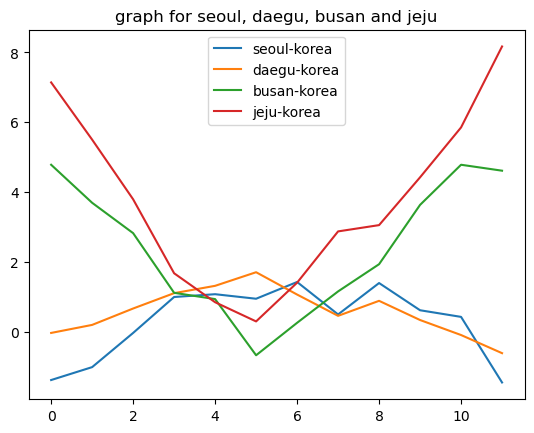

서울, 대구, 부산, 제주
[158.69, 162.19, 184.26999999999998, 200.26000000000002]


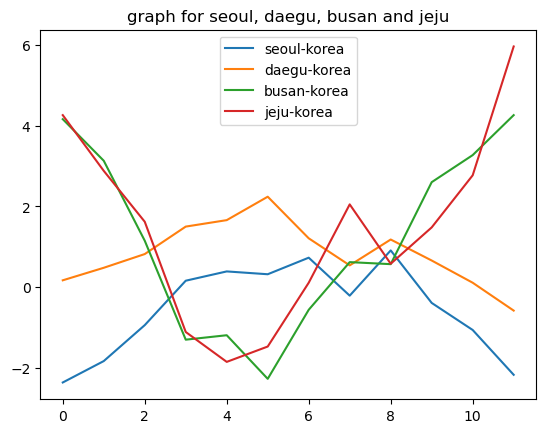

서울, 대구, 부산, 제주
[216.15, 232.58999999999997, 237.04, 239.88]


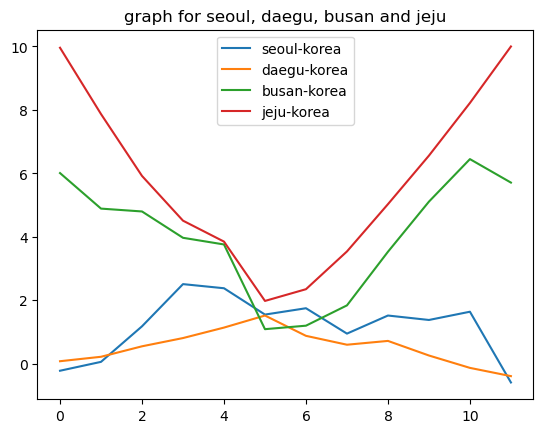

서울, 대구, 부산, 제주
[110.07000000000002, 102.21999999999998, 144.31999999999996, 165.75]


In [1]:
import csv
import matplotlib.pyplot as plt


def main():
    #전국, 서울, 대구, 부산, 제주
    files=["korea.csv","seoul.csv","daegu.csv","busan.csv","jeju.csv"]
    #0->전국, 1 서울 2 대구 3->부산 4->제주
    temperature=[[[] for _ in range(12)] for i in range(5)]
    high_temp=[[[] for _ in range(12)] for i in range(5)]
    low_temp=[[[] for _ in range(12)] for i in range(5)]
    # seoul_temperature=[]
    # daegu_temperature=[]
    # busan_temperature=[]
    # jeju_temperature=[]
    for idx,file in enumerate(files):
        f=open(file,'r',encoding='cp949')
        data=csv.reader(f,delimiter=",")
        head=next(data)
        head=next(data)
        head=next(data)
        head=next(data)
        head=next(data)
        head=next(data)
        next(data)
        for d in data:
            #평균기온
            if d[0]!="" and d[2] != "":
                month=int(d[0].split("-")[1])
                temperature[idx][month-1].append(float(d[2]))
            #최저기온
            if d[0]!="" and d[-2] != "":
                month=int(d[0].split("-")[1])
                low_temp[idx][month-1].append(float(d[-2]))
            #최고기온
            if d[0]!="" and d[-1] != "":
                month=int(d[0].split("-")[1])
                high_temp[idx][month-1].append(float(d[-1]))
        f.close()
    avg_high=[0,0,0,0,0]
    high_high=[0,0,0,0,0]
    low_high=[0,0,0,0,0]
    for i in range(5):
        for j in range(12):
            #소수점 2째자리 반올림
            temperature[i][j]=round(sum(temperature[i][j])/len(temperature[i][j]),2)
            low_temp[i][j]=round(sum(low_temp[i][j])/len(low_temp[i][j]),2)
            high_temp[i][j]=round(sum(high_temp[i][j])/len(high_temp[i][j]),2)
            avg_high[i]+=temperature[i][j]
            high_high[i]+=high_temp[i][j]
            low_high[i]+=low_temp[i][j]




    contrast=[[[] for _ in range(12)] for i in range(4)]
    for i in range(1,5):
        for j in range(12):
            contrast[i-1][j]=temperature[i][j]-temperature[0][j]
    plt.title("graph for seoul, daegu, busan and jeju")
    for i in range(4):
        plt.plot(contrast[i],label=files[i+1].split(".")[0]+"-korea")
    plt.legend()
    plt.show()
    print("서울, 대구, 부산, 제주")
    print(avg_high[1:5])

    contrast=[[[] for _ in range(12)] for i in range(4)]
    for i in range(1,5):
        for j in range(12):
            contrast[i-1][j]=high_temp[i][j]-high_temp[0][j]
    plt.title("graph for seoul, daegu, busan and jeju")
    for i in range(4):
        plt.plot(contrast[i],label=files[i+1].split(".")[0]+"-korea")
    plt.legend()
    plt.show()
    print("서울, 대구, 부산, 제주")
    print(high_high[1:5])

    contrast=[[[] for _ in range(12)] for i in range(4)]
    for i in range(1,5):
        for j in range(12):
            contrast[i-1][j]=low_temp[i][j]-low_temp[0][j]
    plt.title("graph for seoul, daegu, busan and jeju")
    for i in range(4):
        plt.plot(contrast[i],label=files[i+1].split(".")[0]+"-korea")
    plt.legend()
    plt.show()
    print("서울, 대구, 부산, 제주")
    print(low_high[1:5])

    


if __name__ == "__main__":
    main()

첫번 째 그래프는 평균 기온으로 월평균을 만들어, 지역월평균-전국월평균을 빼서 지역별 월별데이터 그래프로 표현하였다>

두번 째 그래프는 최고 기온으로 월평균으로 만들고, 지역월평균-전국월평균을 빼서 지역별 월별데이터  그래프로 표현하였다>

세번 째 그래프는 최저 기온으로 월평균을 만들고, 지역월평균-전국월평균을 빼서  지역별 월별데이터를 그래프로 표현하였다>


그래프 아래의 배열은 서울, 대구, 부산, 제주순으로 일별 온도를 각각 더한 것이다. 


제주가 그래프에서 위 있는 편이면서, 일별 온도를 전부 더한 값에도 모두 1위 의므로 전국대비 가장 덥다고 할 수 있다.


최저 온도에서 대구의 총합이 가장 낮지만, 평균온도와 최고온도의 최저에서 서울이 가장 낮아 전국대비 가장 춥다고 생각할 수 있다.


다만...  덥다는 보통 여름에 사용하고 춥다는 겨울에 사용하므로, "여름"에 평균 최고온도가 가장 높은 곳이 덥고, "겨울"에 평균 최저 온도가 낮은 곳이 춥다고 하는 것이 조금 더 맞다는 판단이 든다.

예시로, 제주도가 평균온도에서 이득을 본 까닭은 겨울이 상대적으로 따뜻했기 때문이다. 

아래는 겨울 (12월-2월) 의 최저 온도와 여름(6,7,8)의 최고 기온을 바탕으로 다시 그래프를 그려본다.


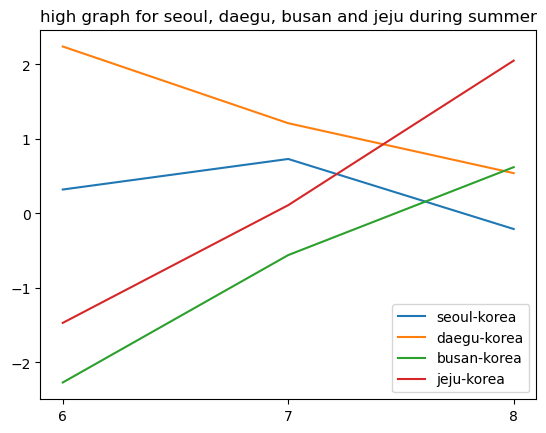

서울, 대구, 부산, 제주
[87.34, 90.49000000000001, 84.29, 87.19]


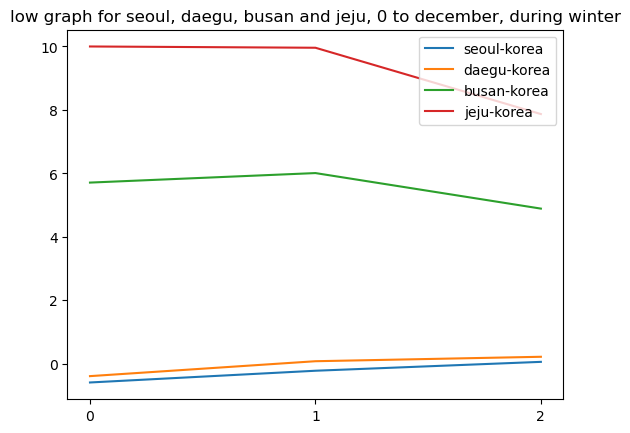

서울, 대구, 부산, 제주
[-18.16, -17.5, -0.8, 10.419999999999998]


In [17]:
import csv
import matplotlib.pyplot as plt


def main():
    #전국, 서울, 대구, 부산, 제주
    files=["korea.csv","seoul.csv","daegu.csv","busan.csv","jeju.csv"]
    #0->전국, 1 서울 2 대구 3->부산 4->제주
    temperature=[[[] for _ in range(12)] for i in range(5)]
    high_temp=[[[] for _ in range(12)] for i in range(5)]
    low_temp=[[[] for _ in range(12)] for i in range(5)]
    # seoul_temperature=[]
    # daegu_temperature=[]
    # busan_temperature=[]
    # jeju_temperature=[]
    for idx,file in enumerate(files):
        f=open(file,'r',encoding='cp949')
        data=csv.reader(f,delimiter=",")
        head=next(data)
        head=next(data)
        head=next(data)
        head=next(data)
        head=next(data)
        head=next(data)
        next(data)
        for d in data:
            #최저기온
            if d[0]!="" and d[-2] != "":
                month=int(d[0].split("-")[1])
                low_temp[idx][month-1].append(float(d[-2]))
            #최고기온
            if d[0]!="" and d[-1] != "":
                month=int(d[0].split("-")[1])
                high_temp[idx][month-1].append(float(d[-1]))
        f.close()
    high_high=[0,0,0,0,0]
    low_high=[0,0,0,0,0]
    for i in range(5):
        for j in range(5,8):
            #소수점 2째자리 반올림
            high_temp[i][j]=round(sum(high_temp[i][j])/len(high_temp[i][j]),2)
            high_high[i]+=high_temp[i][j]
    for i in range(5):
        for j in [-1,0,1]:
            #소수점 2째자리 반올림
            low_temp[i][j]=round(sum(low_temp[i][j])/len(low_temp[i][j]),2)
            low_high[i]+=low_temp[i][j]

    contrast=[[] for i in range(4)]

    for i in range(1,5):
        for j in range(5,8):
            contrast[i-1].append(high_temp[i][j]-high_temp[0][j])
    plt.title("high graph for seoul, daegu, busan and jeju during summer")
    for i in range(4):
        plt.plot([6,7,8],contrast[i],label=files[i+1].split(".")[0]+"-korea")
    plt.xticks([6,7,8])
    plt.legend()
    plt.show()
    
    print("서울, 대구, 부산, 제주")
    print(high_high[1:5])

    contrast=[[] for i in range(4)]
    for i in range(1,5):
        for j in [-1,0,1]:
            contrast[i-1].append(low_temp[i][j]-low_temp[0][j])
    plt.title("low graph for seoul, daegu, busan and jeju, 0 to december, during winter")
    for i in range(4):
        plt.plot(contrast[i],label=files[i+1].split(".")[0]+"-korea")
    plt.xticks([0,1,2])
    plt.legend()
    plt.show()
    print("서울, 대구, 부산, 제주")
    print(low_high[1:5])

    


if __name__ == "__main__":
    main()

12월, 1월 ,2월로 보았을 때 전국 대비 가장 온도가 낮은 것은 서울이며,(그래프가 가장 아래 있으며, 기간 동안 최저 평균기온의 합이  -18.16 으로 가장 낮다) 

6,7,8월 동안 가장 더운 곳은 전국 대비 가장 더운 곳은 대구이다. (그래프가 교차하나, 최고 평균기온의 합이 가장 높다.)

In [ ]:
    # plt.title("average temperature for korea, seoul, daegu, busan and jeju")
    # for i in range(5):
    #     plt.plot(temperature[i],label=files[i].split(".")[0])
    # plt.legend()
    # plt.show()
    # print("전국, 서울, 대구, 부산, 제주")
    # print(avg_high)


    # plt.title("high temperature for korea, seoul, daegu, busan and jeju")
    # for i in range(5):
    #     plt.plot(high_temp[i],label=files[i].split(".")[0])
    # plt.legend()
    # plt.show()
    # print("전국, 서울, 대구, 부산, 제주")
    # print(high_high)


    # plt.title("low temperature for korea, seoul, daegu, busan and jeju")
    # for i in range(5):
    #     plt.plot(low_temp[i],label=files[i].split(".")[0])
    # plt.legend()
    # plt.show()
    # print("전국, 서울, 대구, 부산, 제주")
    # print(low_high)